In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Zoo.csv')

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df=data.copy()

In [7]:
# Drop the non-numeric 'animal name' column
df = df.drop(columns=['animal name'])


In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

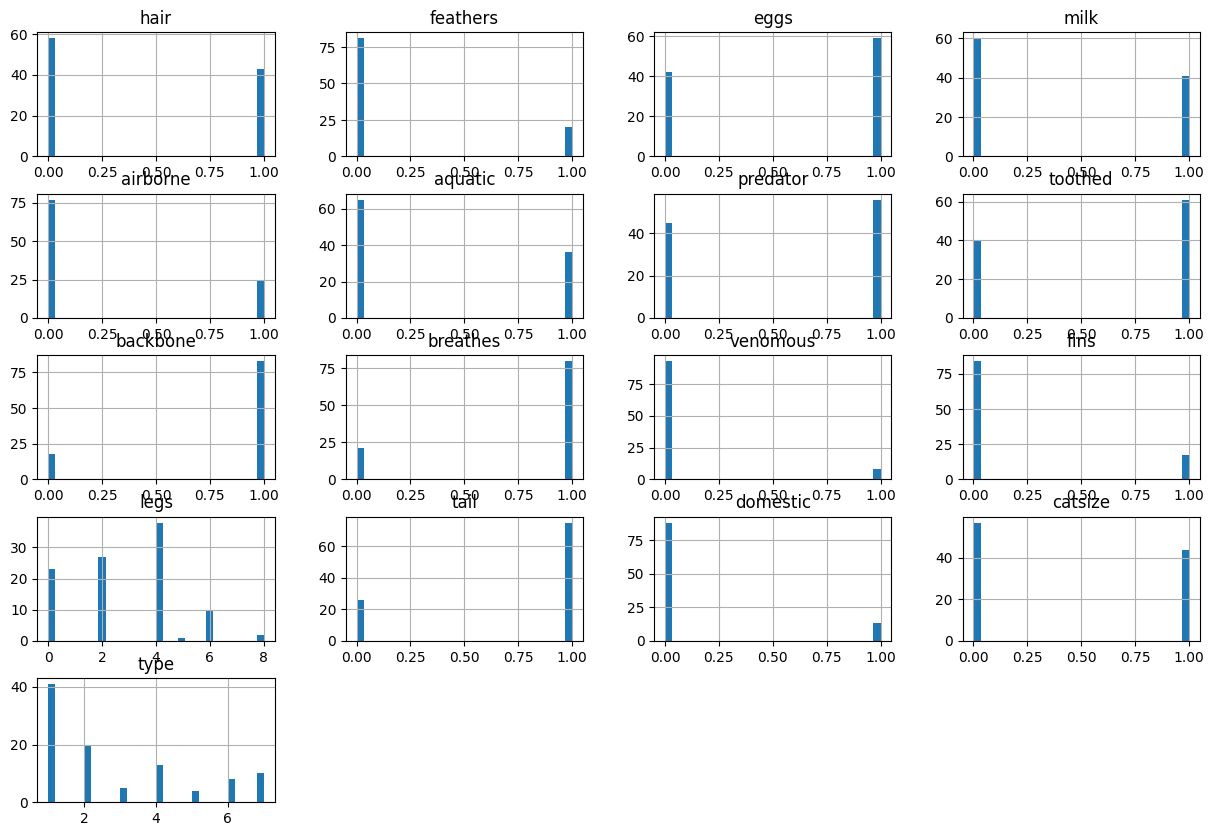

In [16]:
# Visualize the distribution of each feature 
df.hist(bins=30, figsize=(15, 10))
plt.show()

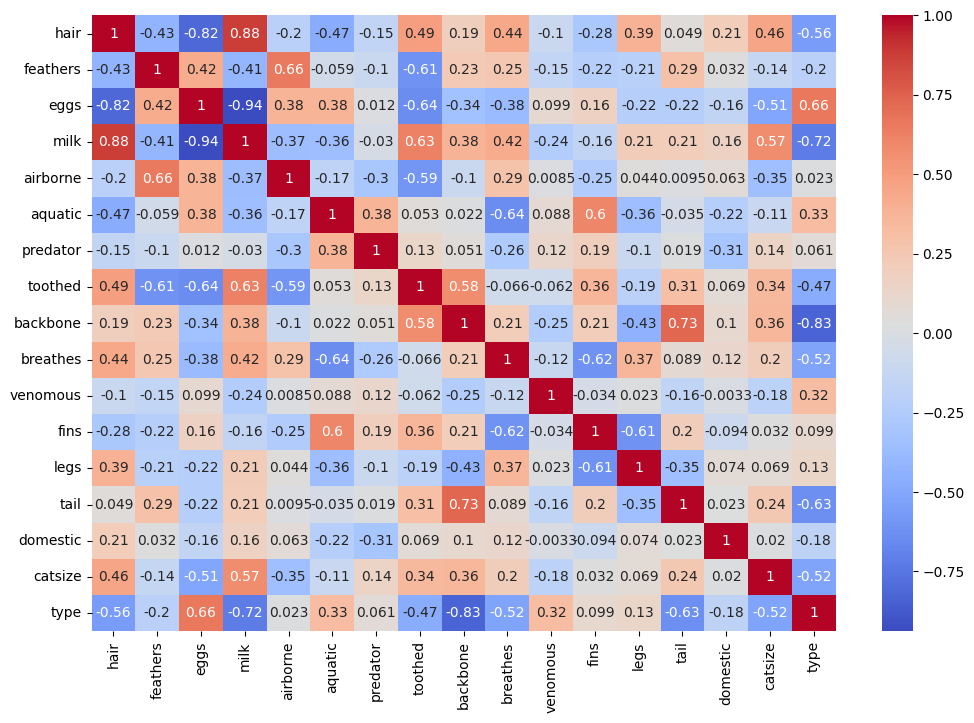

In [17]:
# Heatmap for correlation 
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.show()

In [8]:
# Features (X) and target variable (y)
X = df.drop(columns=['type'])
y = df['type']


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21


Confusion Matrix:
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
import numpy as np

In [26]:
# Select the two features 'backbone' and 'milk' for both training and testing
X_train_vis = X_train[['backbone', 'milk']]
X_test_vis = X_test[['backbone', 'milk']]

# Train the KNN model using these two features
knn_vis = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_vis.fit(X_train_vis, y_train)


KNeighborsClassifier()

c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


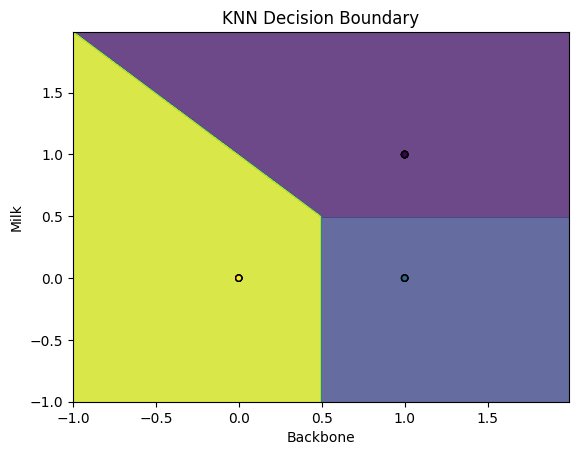

In [27]:
# Visualize the results 
def plot_decision_boundary(X, y, model, title="Decision Boundary"): 
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1 
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, alpha=0.8) 
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k') 
    plt.title(title) 
    plt.xlabel("Backbone") 
    plt.ylabel("Milk") 
    plt.show() 
# Plot the decision boundary using the selected features 
plot_decision_boundary(X_test_vis, y_test, knn_vis, title="KNN Decision Boundary")

1. What are the key hyperparameters in KNN?

In K-Nearest Neighbors (KNN), the key hyperparameters that significantly impact model performance are:

n_neighbors: This parameter defines the number of neighbors to consider when making a prediction. A smaller value (e.g., 1) can lead to an overfitting model, while a larger value (e.g., 15 or 20) can smooth out the predictions but may lead to underfitting if too large.

metric: The distance metric used to compute the distance between points. Common metrics include:

Euclidean (default): The straight-line distance between points.
Manhattan: The sum of absolute differences in each dimension (also known as "city block" distance).

Minkowski: A generalized distance metric, where the power parameter p determines whether it's Euclidean (p=2) or Manhattan (p=1) distance.
Cosine Similarity: Measures the cosine of the angle between two vectors, used for text or high-dimensional data.

weights: This parameter controls how the neighbors are weighted in the prediction. It can take the following values:

uniform: All neighbors are weighted equally (default).
distance: Closer neighbors have a higher weight in the prediction.

2. What distance metrics can be used in KNN?

KNN uses distance metrics to measure the similarity between points. The most commonly used metrics are:

Euclidean Distance (default): The straight-line distance between two points. It's the most commonly used metric when the data is continuous and linear.
​
Manhattan Distance (L1 norm): The sum of absolute differences between corresponding coordinates. It is also known as the "city block" distance, as it measures the distance along grid-like paths (e.g., streets in a city).

Minkowski Distance: A generalization of both Euclidean and Manhattan distances.

Cosine Similarity: This is used to measure the angle between two vectors, typically used in text analysis or high-dimensional data. It is particularly useful when the magnitude of the vectors is not important (e.g., document comparison).

Chebyshev Distance: It measures the maximum difference along any dimension. This is useful when outliers are important or when the data may have varying importance along different dimensions.

Hamming Distance: Used primarily for categorical variables. It counts the number of positions at which the corresponding elements are different.

Jaccard Distance: Used for binary or categorical data, this measures the dissimilarity between two sets by comparing the ratio of their intersection to their union.
​
Each distance metric is suitable for different types of data and use cases, and choosing the right one depends on the nature of the features in your dataset.